In [1]:
from lale.lib.lale import ConcatFeatures as Concat
from lale.lib.lale import NoOp
from lale.lib.lale import Both
from lale.lib.sklearn import KNeighborsClassifier as KNN
from lale.lib.sklearn import LogisticRegression as LR
from lale.lib.sklearn import MinMaxScaler as Scaler
from lale.lib.sklearn import Nystroem
from lale.lib.sklearn import PCA

## Combinator-Style
| Symbol | Name | Description  | Sklearn feature |
| ------ | ---- | ------------ | --------------- |
| >>     | pipe | Feed to next | `make_pipeline` |
| &      | and  | Run both     | `make_union`, includes concat |
| &#x7c; | or   | Choose one   | (missing) |

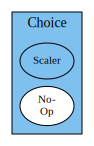

In [2]:
scl = Scaler | NoOp
scl.visualize()

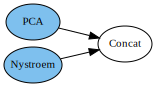

In [3]:
tfm = (PCA & Nystroem) >> Concat
tfm.visualize()

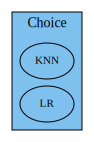

In [4]:
clf = KNN | LR
clf.visualize()

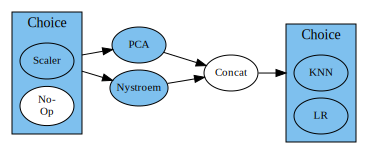

```python
pipeline = (Scaler | NoOp) >> (PCA & Nystroem) >> Concat >> (KNN | LR)
```

In [5]:
optimizable = scl >> tfm >> clf
optimizable.visualize()
optimizable.pretty_print(ipython_display=True, show_imports=False)

In [6]:
optimizable.pretty_print(ipython_display='input')

In [ ]:
# generated by pretty_print(ipython_display='input') from previous cell
from lale.lib.sklearn import MinMaxScaler as Scaler
from lale.lib.lale import NoOp
from lale.lib.sklearn import PCA
from lale.lib.sklearn import Nystroem
from lale.lib.lale import ConcatFeatures as Concat
from lale.lib.sklearn import KNeighborsClassifier as KNN
from lale.lib.sklearn import LogisticRegression as LR
import lale
lale.wrap_imported_operators()

pipeline = (Scaler | NoOp) >> (PCA & Nystroem) >> Concat >> (KNN | LR)

## Sklearn-Style

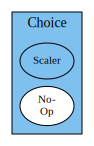

In [7]:
from lale.operators import make_choice, make_pipeline, make_union
scl = make_choice(Scaler, NoOp)
scl.visualize()

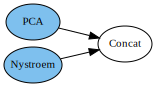

In [8]:
tfm = make_union(PCA, Nystroem)
tfm.visualize()

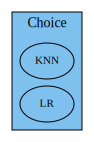

In [9]:
clf = make_choice(KNN, LR)
clf.visualize()

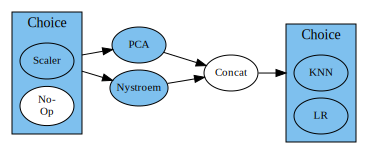

```python
choice_0 = make_choice(Scaler, NoOp)
union = make_union(PCA, Nystroem)
choice_1 = make_choice(KNN, LR)
pipeline = make_pipeline(choice_0, union, choice_1)
```

In [10]:
optimizable = make_pipeline(scl, tfm, clf)
optimizable.visualize()
optimizable.pretty_print(ipython_display=True, show_imports=False, combinators=False)

In [11]:
optimizable.pretty_print(ipython_display='input', combinators=False)

In [ ]:
# generated by pretty_print(ipython_display='input') from previous cell
from lale.lib.sklearn import MinMaxScaler as Scaler
from lale.lib.lale import NoOp
from lale.operators import make_choice
from lale.lib.sklearn import PCA
from lale.lib.sklearn import Nystroem
from lale.operators import make_union
from lale.lib.sklearn import KNeighborsClassifier as KNN
from lale.lib.sklearn import LogisticRegression as LR
from lale.operators import make_pipeline

choice_0 = make_choice(Scaler, NoOp)
union = make_union(PCA, Nystroem)
choice_1 = make_choice(KNN, LR)
pipeline = make_pipeline(choice_0, union, choice_1)

## Nested

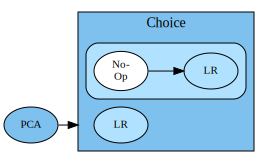

```python
lr_0 = LR(C=0.09)
lr_1 = LR(C=0.19)
pipeline = PCA >> (lr_0 | NoOp >> lr_1)
```

In [12]:
nested = PCA >> (LR(C=0.09) | NoOp >> LR(C=0.19))
nested.visualize()
nested.pretty_print(ipython_display=True, show_imports=False)

In [13]:
from lale.pretty_print import ipython_display
ipython_display(nested.to_json())

```python
{
    'class': 'lale.operators.PlannedPipeline',
    'state': 'planned',
    'edges': [['pca', 'choice']],
    'steps': {
        'pca': {
            'class': 'lale.lib.sklearn.pca.PCAImpl',
            'state': 'planned',
            'operator': 'PCA',
            'label': 'PCA',
            'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.pca.html'},
        'choice': {
            'class': 'lale.operators.OperatorChoice',
            'state': 'planned',
            'operator': 'OperatorChoice',
            'steps': {
                'lr_0': {
                    'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl',
                    'state': 'trainable',
                    'operator': 'LogisticRegression',
                    'label': 'LR',
                    'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.logistic_regression.html',
                    'hyperparams': {
                        'C': 0.09},
                    'is_frozen_trainable': false},
                'pipeline_1': {
                    'class': 'lale.operators.TrainablePipeline',
                    'state': 'trainable',
                    'edges': [['no_op', 'lr_1']],
                    'steps': {
                        'no_op': {
                            'class': 'lale.lib.lale.no_op.NoOpImpl',
                            'state': 'trained',
                            'operator': 'NoOp',
                            'label': 'NoOp',
                            'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.no_op.html',
                            'hyperparams': null,
                            'is_frozen_trainable': true,
                            'coefs': null,
                            'is_frozen_trained': true},
                        'lr_1': {
                            'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl',
                            'state': 'trainable',
                            'operator': 'LogisticRegression',
                            'label': 'LR',
                            'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.logistic_regression.html',
                            'hyperparams': {
                                'C': 0.19},
                            'is_frozen_trainable': false}}}}}}}
```

## Higher-order

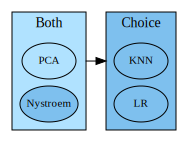

```python
pca = PCA(n_components=2)
both = Both(op1=pca, op2=Nystroem)
pipeline = both >> (KNN | LR)
```

In [14]:
higher_order = Both(op1=PCA(n_components=2), op2=Nystroem) >> (KNN | LR)
higher_order.visualize()
higher_order.pretty_print(ipython_display=True, show_imports=False)

In [15]:
ipython_display(higher_order.to_json())

```python
{
    'class': 'lale.operators.PlannedPipeline',
    'state': 'planned',
    'edges': [['both', 'choice']],
    'steps': {
        'both': {
            'class': 'lale.lib.lale.both.BothImpl',
            'state': 'trainable',
            'operator': 'Both',
            'label': 'Both',
            'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.both.html',
            'hyperparams': {
                'op1': {
                    '$ref': '../steps/pca'},
                'op2': {
                    '$ref': '../steps/nystroem'}},
            'steps': {
                'pca': {
                    'class': 'lale.lib.sklearn.pca.PCAImpl',
                    'state': 'trainable',
                    'operator': 'PCA',
                    'label': 'PCA',
                    'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.pca.html',
                    'hyperparams': {
                        'n_components': 2},
                    'is_frozen_trainable': false},
                'nystroem': {
                    'class': 'lale.lib.sklearn.nystroem.NystroemImpl',
                    'state': 'planned',
                    'operator': 'Nystroem',
                    'label': 'Nystroem',
                    'documentation_url': 'https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html'}},
            'is_frozen_trainable': false},
        'choice': {
            'class': 'lale.operators.OperatorChoice',
            'state': 'planned',
            'operator': 'OperatorChoice',
            'steps': {
                'knn': {
                    'class': 'lale.lib.sklearn.k_neighbors_classifier.KNeighborsClassifierImpl',
                    'state': 'planned',
                    'operator': 'KNeighborsClassifier',
                    'label': 'KNN',
                    'documentation_url': 'https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'},
                'lr': {
                    'class': 'lale.lib.sklearn.logistic_regression.LogisticRegressionImpl',
                    'state': 'planned',
                    'operator': 'LogisticRegression',
                    'label': 'LR',
                    'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.logistic_regression.html'}}}}}
```

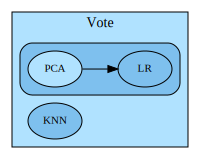

```python
pipeline = Vote(estimators=[('knn', KNN), ('pipeline', PCA() >> LR)], voting='soft')
```

In [16]:
from lale.lib.sklearn import VotingClassifier as Vote
vote = Vote(estimators=[('knn',KNN), ('pipeline',PCA()>>LR)], voting='soft')
vote.visualize()
vote.pretty_print(ipython_display=True, show_imports=False)